In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = pd.read_csv("ms_data_Q2.csv")
data["visit_date"] = pd.to_datetime(data["visit_date"], format="%Y-%m-%d")

## 1. walking speed analytsis

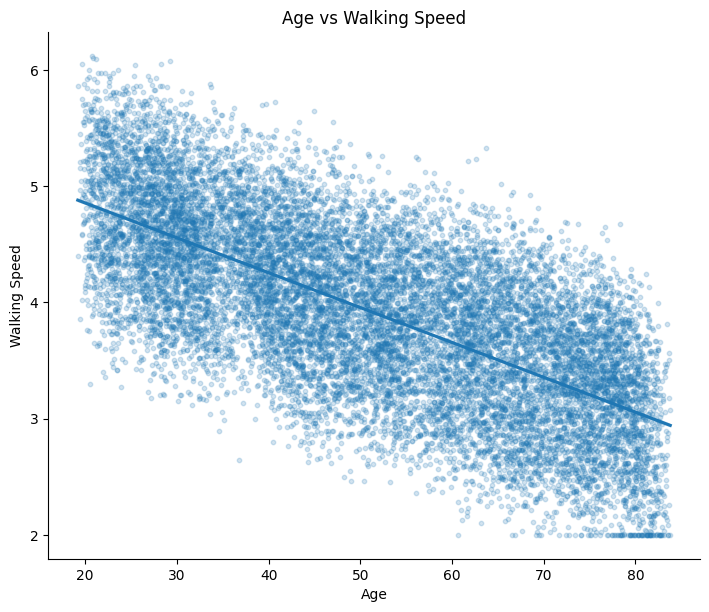

In [68]:
# Regression plot with distinct colors for regression lines and scatter points

sns.lmplot(x='age', y='walking_speed', data=data, 
           height=6, aspect=1.2,
           scatter_kws={'s': 10, 'alpha': 0.2})
# Add title and labels
plt.xlabel('Age')
plt.ylabel('Walking Speed')
plt.title('Age vs Walking Speed')
plt.show()

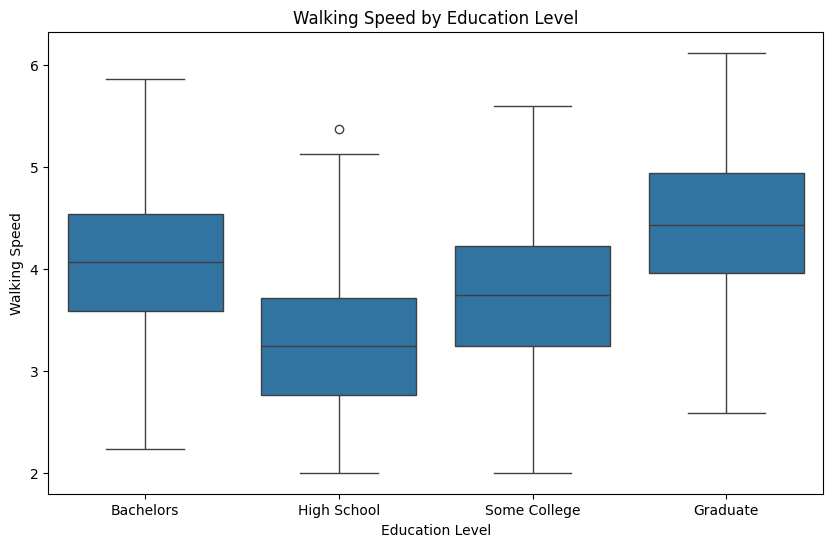

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='education_level', y='walking_speed', data=data)
plt.xlabel('Education Level')
plt.ylabel('Walking Speed')
plt.title('Walking Speed by Education Level')
plt.show()

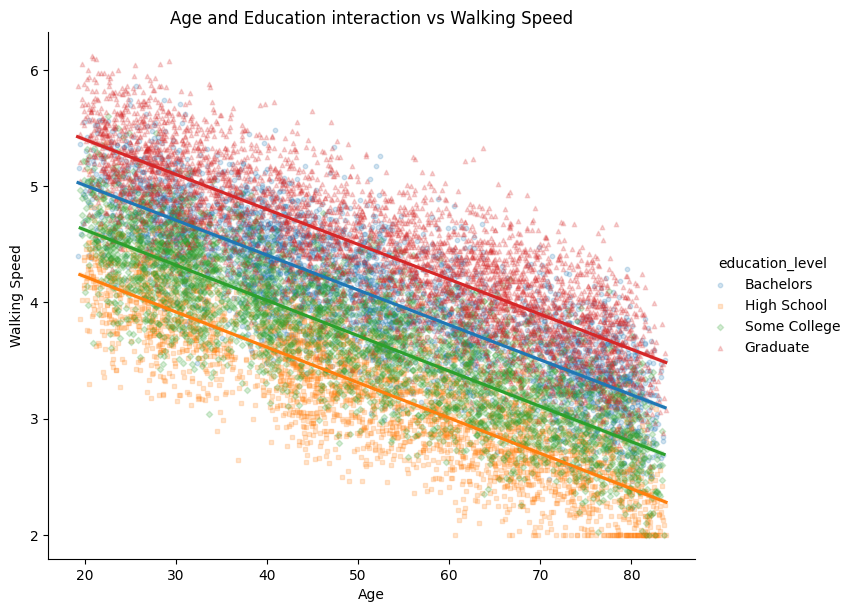

In [70]:
sns.lmplot(x='age', y='walking_speed', hue='education_level', data=data, 
           height=6, aspect=1.2, markers=["o", "s", "D", "^"],
           scatter_kws={'s': 10, 'alpha': 0.2})

plt.xlabel('Age')
plt.ylabel('Walking Speed')
plt.title('Age and Education interaction vs Walking Speed')
plt.show()

## 2. Cost analysis

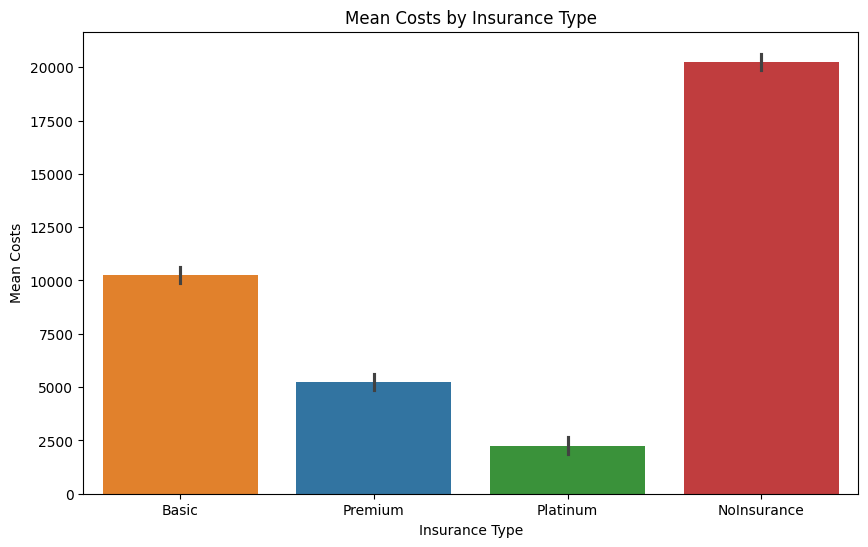

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='insurance_type', y='costs', data=data, 
            hue='insurance_type', errorbar="sd",
            order=['Basic', 'Premium', 'Platinum', 'NoInsurance'])
plt.xlabel('Insurance Type')
plt.ylabel('Mean Costs')
plt.title('Mean Costs by Insurance Type')
plt.show()

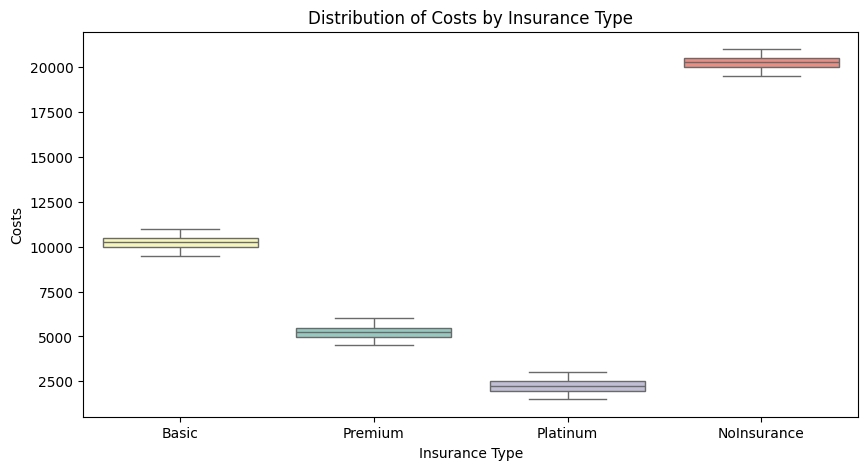

In [72]:
# Box plot showing the distribution of costs across insurance types
plt.figure(figsize=(10, 5))
sns.boxplot(x='insurance_type', y='costs', data=data, hue='insurance_type',
            order=['Basic', 'Premium', 'Platinum', 'NoInsurance'], palette="Set3")

# Add title and labels
plt.xlabel('Insurance Type')
plt.ylabel('Costs')
plt.title('Distribution of Costs by Insurance Type')
plt.show()


## 3. Combined visualizations

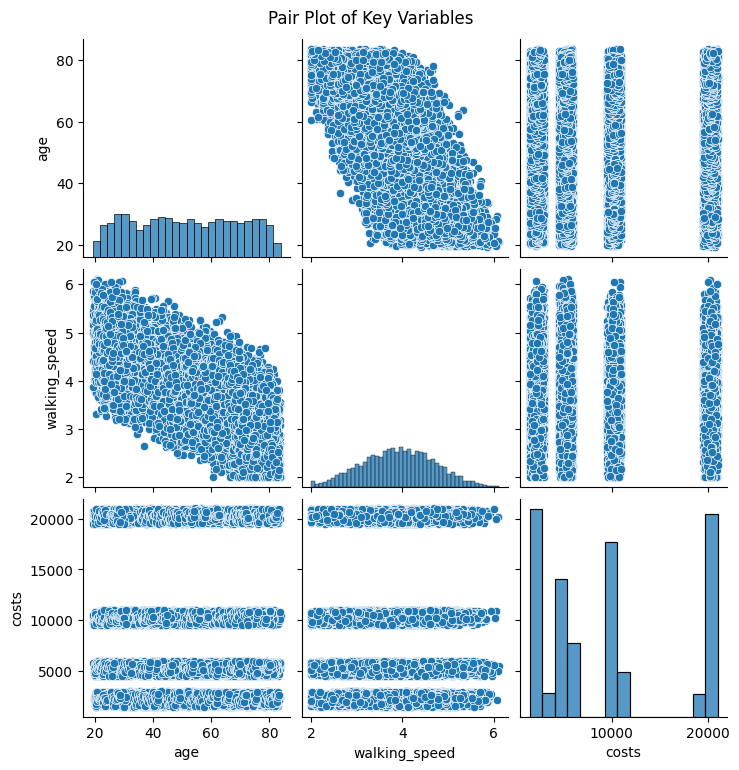

In [73]:
key_variables = ['age', 'walking_speed', 'costs']
sns.pairplot(data[key_variables])
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

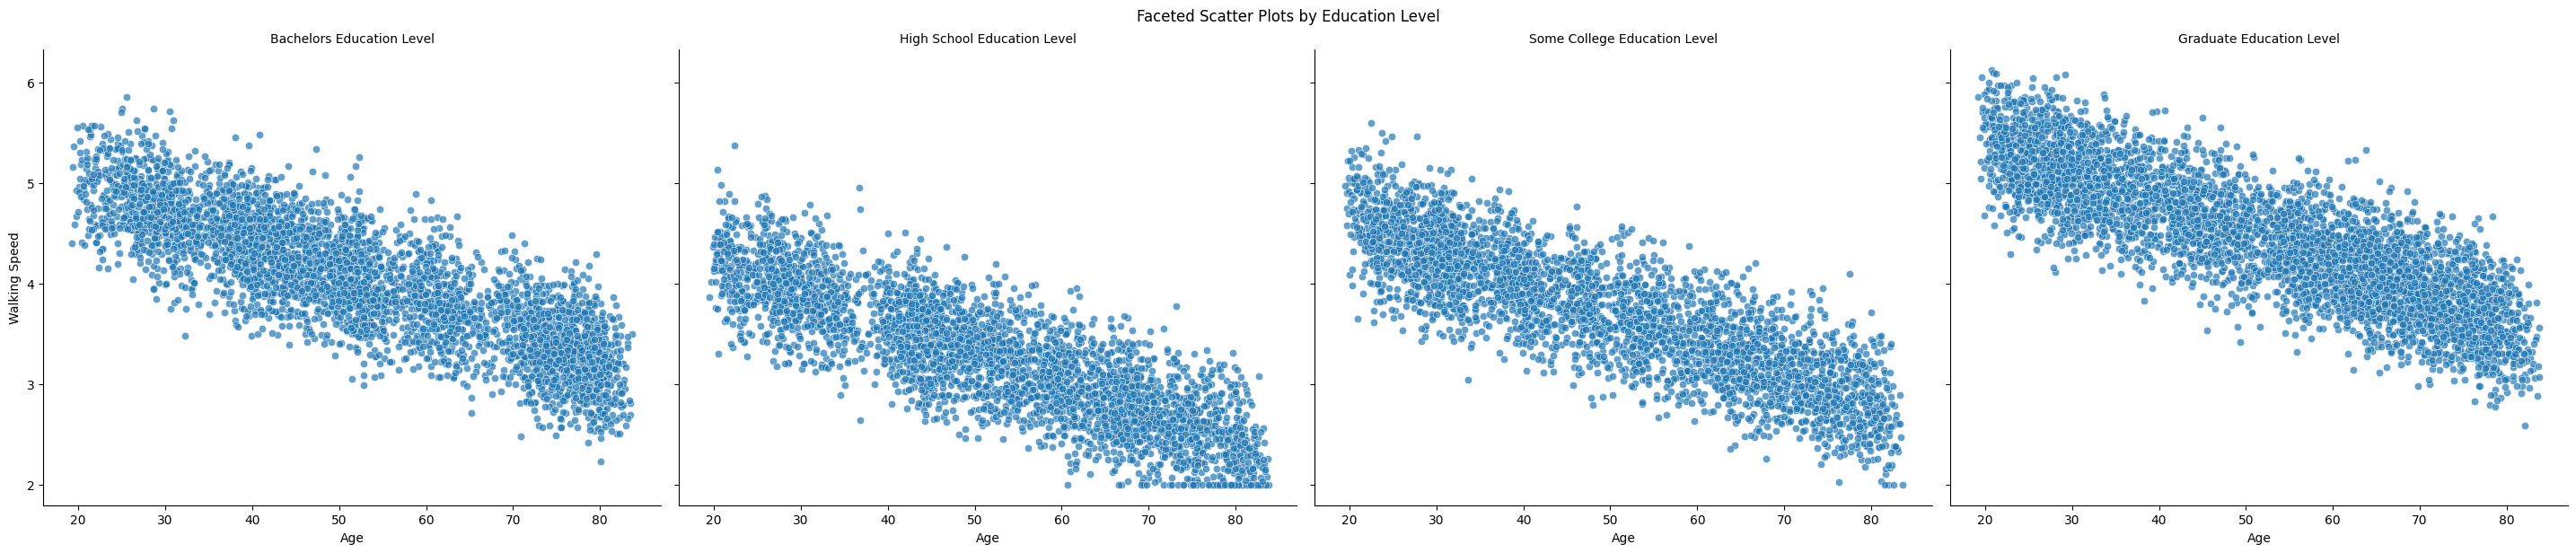

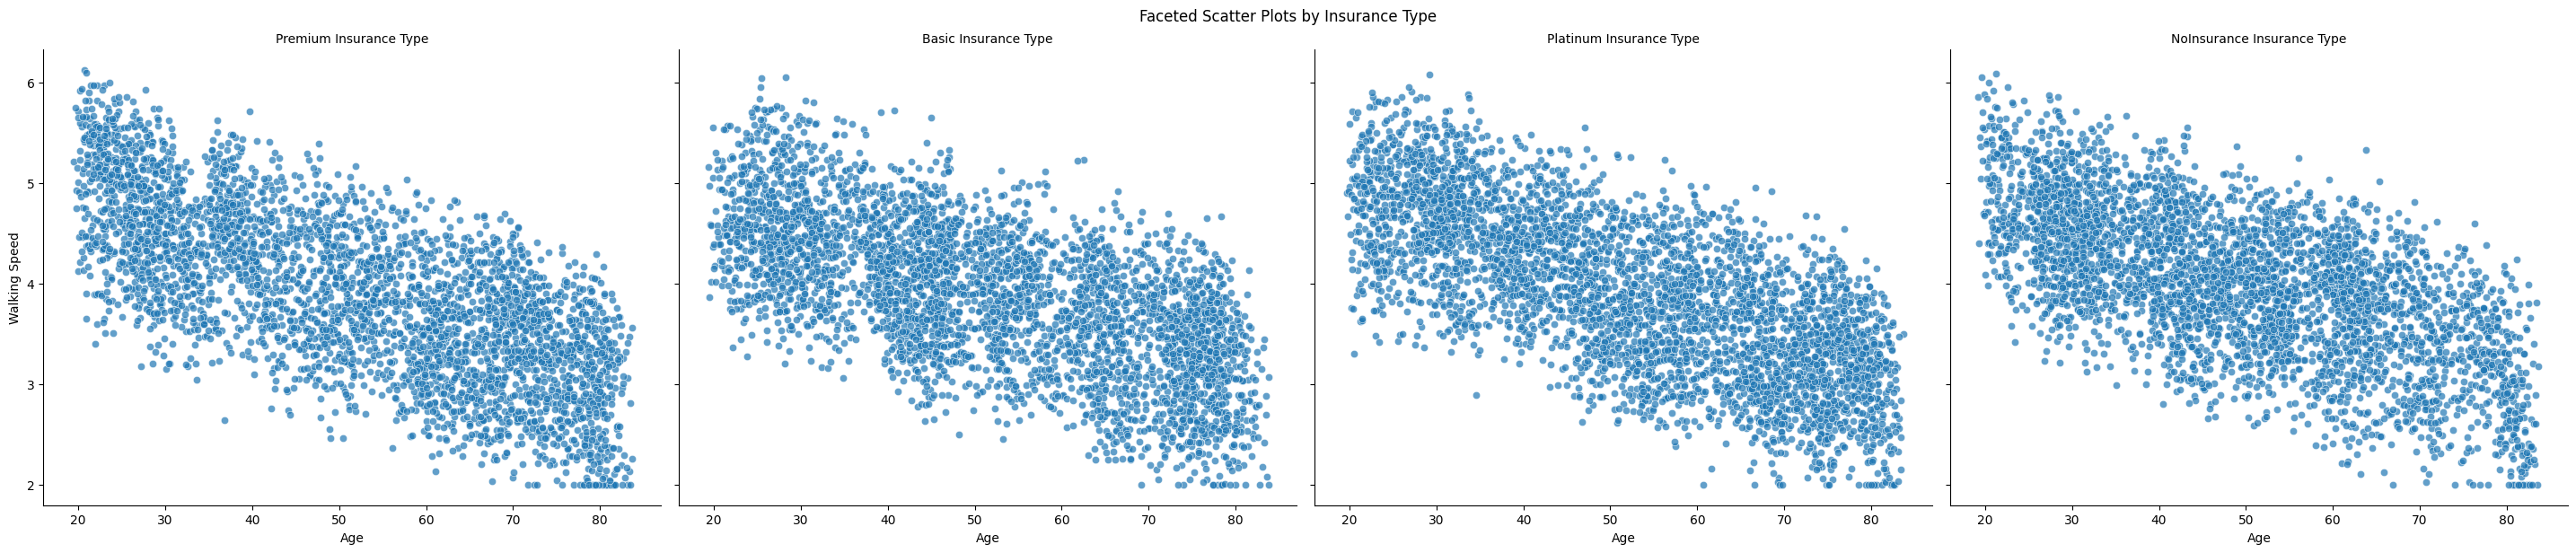

In [74]:
# Faceted scatter plots by education level
g = sns.FacetGrid(data, col="education_level", height=6, aspect=1.2)
g.map(sns.scatterplot, 'age', 'walking_speed', alpha=0.7)
g.set_axis_labels("Age", "Walking Speed")
g.set_titles("{col_name} Education Level")
plt.suptitle('Faceted Scatter Plots by Education Level', y=1.02)
plt.show()

# Faceted scatter plots by insurance type
g = sns.FacetGrid(data, col="insurance_type", height=6, aspect=1.2)
g.map(sns.scatterplot, 'age', 'walking_speed', alpha=0.7)
g.set_axis_labels("Age", "Walking Speed")
g.set_titles("{col_name} Insurance Type")
plt.suptitle('Faceted Scatter Plots by Insurance Type', y=1.02)
plt.show()


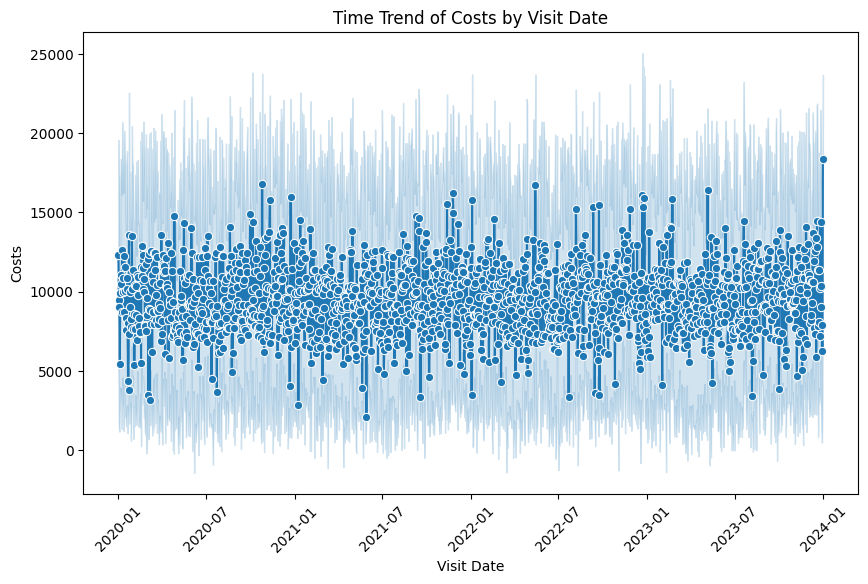

In [77]:
# Sort data by visit_date
data_sorted = data.sort_values(by='visit_date', ascending=True)

# Time trend of costs by visit date
plt.figure(figsize=(10, 6))
sns.lineplot(x='visit_date', y='costs', data=data_sorted, errorbar='sd', marker='o')
plt.xlabel('Visit Date')
plt.ylabel('Costs')
plt.title('Time Trend of Costs by Visit Date')
plt.xticks(rotation=45)
plt.show()